In [12]:
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import pickle

In [13]:
# Load data from the pickle file
with open('data.pickle', 'rb') as f:
    X_fit, y_fit, X_test, y_test = pickle.load(f)


## Logistic Regression Default

In [14]:
# Define the logistic regression model
def logistic_regression_model(X_fit, y_fit, X_test, y_test):

    # Initialize logistic regression model with default parameters
    model = LogisticRegression()
    # Fit the model on the training data
    model.fit(X_fit, y_fit)
    
    # Predict on the testing data
    y_pred_lr = model.predict(X_test)


    # Calculate parameters on test data
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    recall_lr = recall_score(y_test, y_pred_lr)
    precision_lr = precision_score(y_test, y_pred_lr)
    f1_lr = f1_score(y_test, y_pred_lr)
    roc_lr = roc_auc_score(y_test, y_pred_lr)

    y_prob_lr = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob_lr)  # Assign the third value to 
    roc_auc = auc(fpr, tpr)

    # Save the model metrics
    models = [('Logistic Regression Defult', accuracy_lr, recall_lr, precision_lr, f1_lr, roc_lr, roc_auc)]
    df_logistic_metrics = pd.DataFrame(models, columns = ['Model', 'Accuracy (%)', 'Recall (%)', 'Precision (%)', 'F1 (%)', 'AUC(%)', 'AUC from fpr tpr(%)'])

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    
    return y_pred_lr, df_logistic_metrics, plt



### Call the logistic regression model function

,Model,Accuracy (%),Recall (%),Precision (%),F1 (%),AUC(%),AUC from fpr tpr(%)
0,Logistic Regression Defult,0.787396,0.25498,0.705882,0.374634,0.609807,0.6182


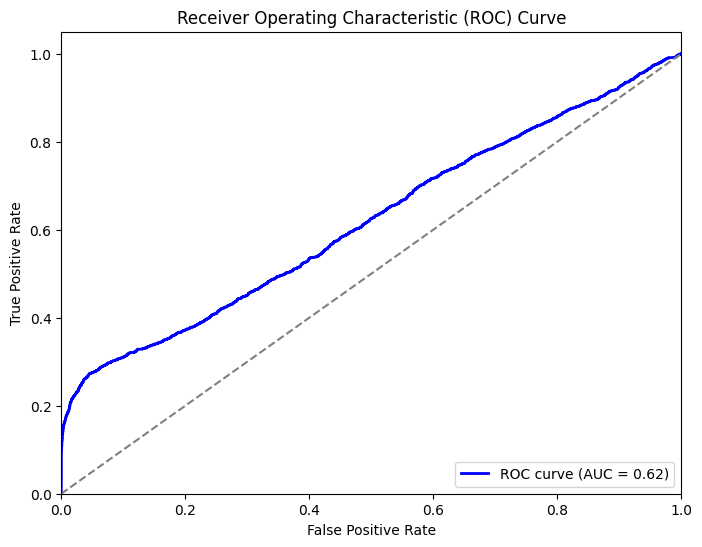

In [15]:
y_pred_lr, df_logistic_metrics, plt = logistic_regression_model(X_fit, y_fit, X_test, y_test)
df_logistic_metrics

## Random Forest Default

In [16]:
# Define the random forest model
def random_forest_model(X_fit, y_fit, X_test, y_test):

    # Initialize random forest model with default parameters
    model = RandomForestClassifier()
    # Fit the model on the training data
    model.fit(X_fit, y_fit)
    
    # Predict on the testing data
    y_pred_rf = model.predict(X_test)

    # Calculate parameters on test data
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    recall_rf = recall_score(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf)
    f1_rf = f1_score(y_test, y_pred_rf)
    roc_rf = roc_auc_score(y_test, y_pred_rf)

    # Calculate probabilities of the positive class for fpr tpr calculation
    y_prob_rf = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
    roc_auc = auc(fpr, tpr)

    # Save the model metrics
    models = [('Random Forest Defult', accuracy_rf, recall_rf, precision_rf, f1_rf, roc_rf, roc_auc)]
    df_random_metrics = pd.DataFrame(models, columns = ['Model', 'Accuracy (%)', 'Recall (%)', 'Precision (%)', 'F1 (%)', 'AUC(%)', 'AUC from fpr tpr(%)'])

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    
    return y_pred_rf, df_random_metrics, plt

### Call the random forest model function

,Model,Accuracy (%),Recall (%),Precision (%),F1 (%),AUC(%),AUC from fpr tpr(%)
0,Random Forest Defult,0.848203,0.614431,0.734392,0.669077,0.770228,0.903957


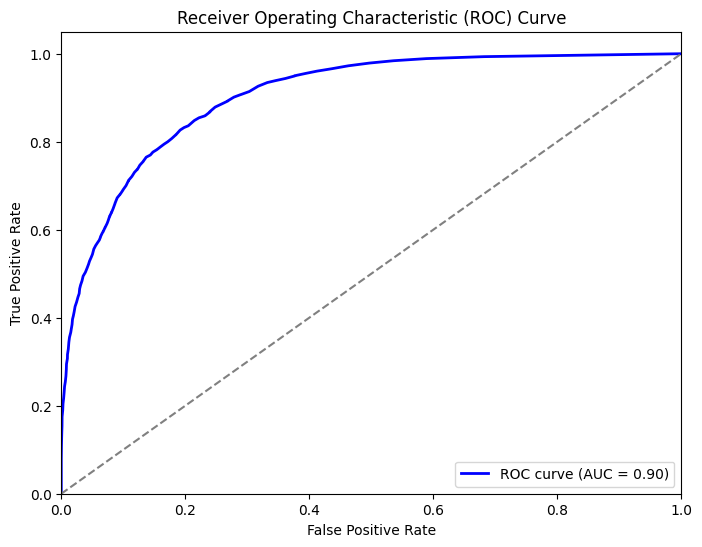

In [17]:
y_pred_rf, df_random_metrics, plt = random_forest_model(X_fit, y_fit, X_test, y_test)
df_random_metrics